## Context

We are about to create a model to predict the survivors of the titanic according to the dataset provided by kaggle.com 


## Importing the needed libraries

In [127]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras.layers
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential,load_model
from keras.utils import np_utils
import statsmodels.api as sm
import sklearn

sns.set()

## Let's start

### Import the dataset

In [128]:
train_data=pd.read_csv('data/titanic/train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Plot some colomns

#### Age

/Users/follow/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/follow/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

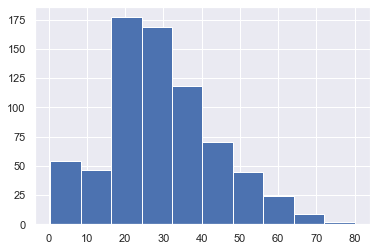

In [129]:
plt.hist(train_data['Age'])

#### Sibling/Spouse

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

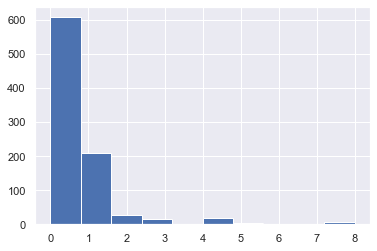

In [130]:
plt.hist(train_data['SibSp'])

#### Parent/Child

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

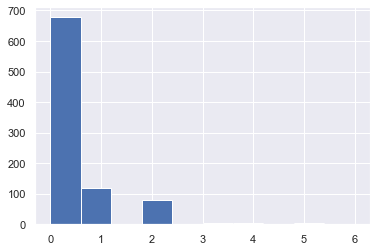

In [131]:
plt.hist(train_data['Parch'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

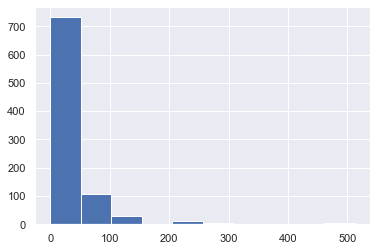

In [132]:
plt.hist(train_data['Fare'])

In [133]:
np.count_nonzero(train_data['Fare'])

876

In [134]:
help(np.percentile)

Help on function percentile in module numpy:

percentile(a, q, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
    Compute the q-th percentile of the data along the specified axis.
    
    Returns the q-th percentile(s) of the array elements.
    
    Parameters
    ----------
    a : array_like
        Input array or object that can be converted to an array.
    q : array_like of float
        Percentile or sequence of percentiles to compute, which must be between
        0 and 100 inclusive.
    axis : {int, tuple of int, None}, optional
        Axis or axes along which the percentiles are computed. The
        default is to compute the percentile(s) along a flattened
        version of the array.
    
        .. versionchanged:: 1.9.0
            A tuple of axes is supported
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output,
     

In [135]:
sex=np.unique(train_data['Sex'],return_counts=True)
sex

(array(['female', 'male'], dtype=object), array([314, 577]))

([<matplotlib.patches.Wedge at 0x14f611cd0>,
 [Text(0.4919453215643337, 0.9838647267744507, 'female'),
  Text(-0.5366675230344743, -1.0733070249094814, 'male')],
 [Text(0.2683338117623638, 0.5366534873315185, '35.24%'),
  Text(-0.31305605510344336, -0.6260957645305307, '64.76%')])

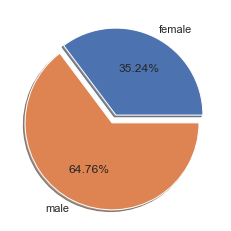

In [136]:
explode = (0, 0.1 ) 
plt.pie(sex[1],labels=sex[0],explode=explode, autopct='%1.2f%%',shadow=True)

## Start the cleaning process

In [137]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [138]:
train_data=train_data.loc[:,train_data.columns!="Cabin"]
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


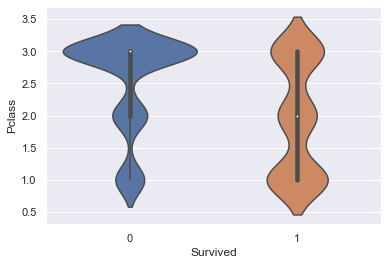

In [139]:
sns.violinplot(x="Survived", y="Pclass", data=train_data)
plt.show()

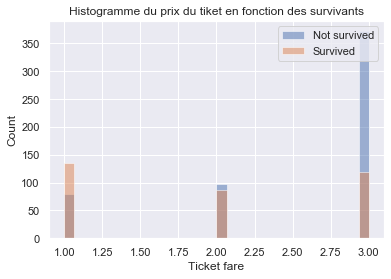

In [140]:
bins=30
plt.hist(train_data.Pclass.loc[train_data.Survived==0], bins, alpha=0.5, label='Not survived')
plt.hist(train_data.Pclass.loc[train_data.Survived==1], bins, alpha=0.5, label='Survived')
plt.title("Histogramme du prix du tiket en fonction des survivants")
plt.ylabel("Count")
plt.xlabel("Ticket fare")
plt.legend(loc='upper right')
plt.show()

In [141]:
emb_mod=train_data['Embarked'].mode()

In [142]:
emb_mod

0    S
dtype: object

In [143]:
train_data["Embarked"].fillna(str(emb_mod),inplace=True)

train_data.isnull().sum()

/Users/follow/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [144]:
embarked=np.unique(train_data['Embarked'],return_counts=True)
embarked

(array(['0    S\ndtype: object', 'C', 'Q', 'S'], dtype=object),
 array([  2, 168,  77, 644]))

In [145]:
ticket=np.unique(train_data['Ticket'],return_counts=True)
ticket

(array(['110152', '110413', '110465', '110564', '110813', '111240',
        '111320', '111361', '111369', '111426', '111427', '111428',
        '112050', '112052', '112053', '112058', '112059', '112277',
        '112379', '113028', '113043', '113050', '113051', '113055',
        '113056', '113059', '113501', '113503', '113505', '113509',
        '113510', '113514', '113572', '113760', '113767', '113773',
        '113776', '113781', '113783', '113784', '113786', '113787',
        '113788', '113789', '113792', '113794', '113796', '113798',
        '113800', '113803', '113804', '113806', '113807', '11668', '11751',
        '11752', '11753', '11755', '11765', '11767', '11769', '11771',
        '11774', '11813', '11967', '12233', '12460', '12749', '13049',
        '13213', '13214', '13502', '13507', '13509', '13567', '13568',
        '14311', '14312', '14313', '14973', '1601', '16966', '16988',
        '17421', '17453', '17463', '17464', '17465', '17466', '17474',
        '17764', '19877', 

In [146]:
age_med=train_data['Age'].median()
age_med

28.0

In [147]:
train_data['Age'].fillna(age_med,inplace=True)
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [148]:
train_data=train_data.drop(['PassengerId','Name','Ticket'],axis=1)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [149]:
sex_dummi=pd.get_dummies(train_data['Sex'])

In [150]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [151]:
#train_data=pd.concat([train_data.drop(['Sex'],axis=1),sex_dummi],axis=1)
#train_data.drop(['Sex'],axis=1)
from sklearn.preprocessing import LabelEncoder
le=dict()
le['Embarked']=LabelEncoder()
le['Embarked'].fit(train_data['Embarked'])
train_data['Embarked']=le['Embarked'].transform(train_data['Embarked'])
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,3
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,3
3,1,1,female,35.0,1,0,53.1000,3
4,0,3,male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,3
887,1,1,female,19.0,0,0,30.0000,3
888,0,3,female,28.0,1,2,23.4500,3
889,1,1,male,26.0,0,0,30.0000,1


In [332]:
y_data=train_data['Survived']
y_data

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [333]:
x_data=train_data.loc[:,train_data.columns!='Survived']
x_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,3
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,3
3,1,female,35.0,1,0,53.1000,3
4,3,male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,3
887,1,female,19.0,0,0,30.0000,3
888,3,female,28.0,1,2,23.4500,3
889,1,male,26.0,0,0,30.0000,1


In [334]:
x_data=pd.concat([x_data,pd.get_dummies(x_data['Sex'])],axis=1)
x_data.drop(['Sex'],axis=1)
x_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,3,male,22.0,1,0,7.2500,3,0,1
1,1,female,38.0,1,0,71.2833,1,1,0
2,3,female,26.0,0,0,7.9250,3,1,0
3,1,female,35.0,1,0,53.1000,3,1,0
4,3,male,35.0,0,0,8.0500,3,0,1
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,3,0,1
887,1,female,19.0,0,0,30.0000,3,1,0
888,3,female,28.0,1,2,23.4500,3,1,0
889,1,male,26.0,0,0,30.0000,1,0,1


In [335]:
x_data=x_data.drop(['Sex'],axis=1)

In [336]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(
    x_data, y_data, test_size=0.2, random_state=777)

In [337]:
len(x_train)

712

In [338]:
len(x_validation)

179

In [339]:
#x_train=x_train.drop([x_train.columns[6],x_train.columns[7]],axis=1)

from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='median')
x_train_impute=imp.fit_transform(x_train)
x_validation_imp=imp.fit_transform(x_validation)

In [340]:
from sklearn.linear_model import LogisticRegression

In [374]:
logit=LogisticRegression(penalty='l1',solver='liblinear')
log_reg=logit.fit(x_train_impute,y_train)
log_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [375]:
coefs=log_reg.coef_.flatten()
coefs

array([-1.12977434e+00, -4.08334706e-02, -2.29523472e-01, -4.16842442e-02,
        7.96725335e-04, -1.60529354e-01,  2.74477088e+00,  0.00000000e+00])

In [376]:
def print_coefs(log,x):
    coefficients = pd.Series(log.coef_.flatten(), index=x.columns)\
    .sort_values(ascending=False)
    print(coefficients)

In [377]:
train_predictions=logit.predict(x_train_impute)

In [378]:
from scipy import stats

In [379]:
def get_sumary(X):
    params = np.append(logit.intercept_,logit.coef_)

    newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
    MSE = (sum((y_train-train_predictions)**2))/(len(newX)-len(newX.columns))

    # Note if you don't want to use a DataFrame replace the two lines above with
    # newX = np.append(np.ones((len(X),1)), X, axis=1)
    # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,8)
    params = np.round(params,4)

    myDF3 = pd.DataFrame()
    myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["p-values"] = [params,sd_b,ts_b,p_values]
    print(myDF3)

In [380]:
get_sumary(x_train_impute)

   Coefficients  Standard Errors  t values  p-values
0        2.7130      2675255.457     0.000  0.999999
1       -1.1298            0.026   -43.162  0.000000
2       -0.0408            0.001   -28.399  0.000000
3       -0.2295            0.017   -13.384  0.000000
4       -0.0417            0.023    -1.780  0.075461
5        0.0008            0.000     1.755  0.079613
6       -0.1605            0.022    -7.195  0.000000
7        2.7448      2675255.457     0.000  0.999999
8        0.0000      2675255.457     0.000  1.000000


In [381]:
x_train=x_train.drop([x_train.columns[6],x_train.columns[7]],axis=1)
x_train_impute=imp.fit_transform(x_train)

In [382]:
x_validation=x_validation.drop([x_validation.columns[6],x_validation.columns[7]],axis=1)
x_validation_imp=imp.fit_transform(x_validation)

In [383]:
logit=LogisticRegression(penalty='l1',solver='liblinear')
log_reg=logit.fit(x_train_impute,y_train)

In [384]:
print_coefs(logit,x_train)

female      2.744771
Fare        0.000797
male        0.000000
Age        -0.040833
Parch      -0.041684
Embarked   -0.160529
SibSp      -0.229523
Pclass     -1.129774
dtype: float64


In [385]:
get_sumary(x_train_impute)

   Coefficients  Standard Errors  t values  p-values
0        2.7130      2675255.457     0.000  0.999999
1       -1.1298            0.026   -43.162  0.000000
2       -0.0408            0.001   -28.399  0.000000
3       -0.2295            0.017   -13.384  0.000000
4       -0.0417            0.023    -1.780  0.075461
5        0.0008            0.000     1.755  0.079613
6       -0.1605            0.022    -7.195  0.000000
7        2.7448      2675255.457     0.000  0.999999
8        0.0000      2675255.457     0.000  1.000000


In [386]:
validation_pred=logit.predict(x_validation_imp)

In [387]:
cm_val=confusion_matrix(y_validation,validation_pred)
cm_val

array([[101,  16],
       [ 19,  43]])

In [388]:
precision=(cm_val[0,0]+cm_val[1,1])/cm_val.sum()
print('Model precision : ',precision)

Model precision :  0.8044692737430168


In [189]:
test_data=pd.read_csv('data/titanic/test.csv')
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [190]:
test_data['Age'].fillna(test_data['Age'].median(),inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(),inplace=True)

test_data=test_data.drop(['Name','PassengerId','Cabin','Ticket'],axis=1)

In [191]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


In [192]:
test_data=pd.concat([test_data,pd.get_dummies(test_data['Sex'])],axis=1)
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,3,male,34.5,0,0,7.8292,Q,0,1
1,3,female,47.0,1,0,7.0000,S,1,0
2,2,male,62.0,0,0,9.6875,Q,0,1
3,3,male,27.0,0,0,8.6625,S,0,1
4,3,female,22.0,1,1,12.2875,S,1,0
...,...,...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S,0,1
414,1,female,39.0,0,0,108.9000,C,1,0
415,3,male,38.5,0,0,7.2500,S,0,1
416,3,male,27.0,0,0,8.0500,S,0,1


In [193]:
test_data=test_data.drop(['Sex'],axis=1)
le=dict()
le['Embarked']=LabelEncoder()
le['Embarked'].fit(test_data['Embarked'])
test_data['Embarked']=le['Embarked'].transform(test_data['Embarked'])
test_data

,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,3,34.5,0,0,7.8292,1,0,1
1,3,47.0,1,0,7.0000,2,1,0
2,2,62.0,0,0,9.6875,1,0,1
3,3,27.0,0,0,8.6625,2,0,1
4,3,22.0,1,1,12.2875,2,1,0
...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,2,0,1
414,1,39.0,0,0,108.9000,0,1,0
415,3,38.5,0,0,7.2500,2,0,1
416,3,27.0,0,0,8.0500,2,0,1


In [194]:
x_test=imp.fit_transform(test_data)
x_test

array([[ 3. , 34.5,  0. , ...,  1. ,  0. ,  1. ],
       [ 3. , 47. ,  1. , ...,  2. ,  1. ,  0. ],
       [ 2. , 62. ,  0. , ...,  1. ,  0. ,  1. ],
       ...,
       [ 3. , 38.5,  0. , ...,  2. ,  0. ,  1. ],
       [ 3. , 27. ,  0. , ...,  2. ,  0. ,  1. ],
       [ 3. , 27. ,  1. , ...,  0. ,  0. ,  1. ]])

In [195]:
train_pred=logit.predict(x_train_impute)
test_pred=logit.predict(x_test)

In [196]:
from sklearn.metrics import confusion_matrix

In [197]:
cm=confusion_matrix(y_train,train_pred)
cm

array([[369,  63],
       [ 80, 200]])

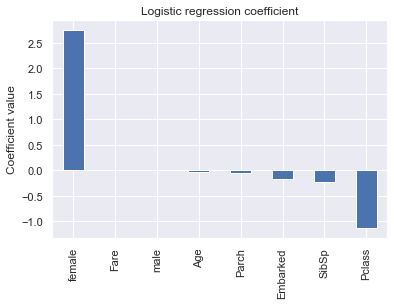

In [198]:

coefficients.plot(kind="bar")
plt.title("Logistic regression coefficient")
plt.ylabel("Coefficient value")
plt.show()

In [204]:
data=pd.read_csv('data/titanic/test.csv')
test_pred=pd.DataFrame(test_pred)
test_pred=pd.concat([data['PassengerId'],test_pred],axis=1)
test_pred.columns=["PassengerID","Survived"]
test_pred

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [182]:
np.savetxt("prediction2.csv",test_pred)

In [205]:
#test_pred=test_pred.drop(['PassengerID'],axis=1)
test_pred.to_csv("predictions.csv", sep=',',index=False)

In [206]:
test_pred

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [403]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_data, y_data)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
val_pred=random_forest.predict(x_validation_imp)
val_score=round(random_forest.score(x_validation_imp, y_validation) * 100, 2)
print('validation score : ',val_score)
acc_random_forest = round(random_forest.score(x_data, y_data) * 100, 2)
acc_random_forest

validation score :  98.32


97.98

In [404]:
cmm=confusion_matrix(val_pred,y_validation)

In [405]:
cmm

array([[115,   1],
       [  2,  61]])

In [397]:
precision=(cmm[0,0]+cmm[1,1])/cmm.sum()
print('Model precision : ',precision)

Model precision :  0.7877094972067039


In [409]:
#Y_pred=pd.concat([data['PassengerId'],test_pred],axis=1)
#Y_pred.columns=["Survived"]
Y_pred=Y_pred.drop(["PassengerID"],axis=1)

In [410]:
#test_pred=test_pred.drop(['PassengerID'],axis=1)
Y_pred.to_csv("predictions_rf.csv", sep=',',index=False)